In [1]:
import pandas as pd

In [2]:
file = "Desktop/Electric_Vehicle_Population_Data.csv"

In [51]:
"""
Description of data 

From data.gov: “This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid 
Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).”

Main inquiry question

How do 1) Vehicle price, 2) CAFV Eligibilty, and 3) Vehicle range, relate to their brand and make as well as 
what their companies focus on?

"""

'\nDescription of data \n\nFrom data.gov: “This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid \nElectric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).”\n\nMain inquiry question\n\nHow do 1) Vehicle price, 2) CAFV Eligibilty, and 3) Vehicle range, relate to their brand and make as well as \nwhat their companies focus on?\n\n'

In [3]:
df = pd.read_csv(file)

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
# Drop unwanted features

In [6]:
df = df.drop("State", axis=1)

In [7]:
df = df.drop("Postal Code", axis=1)

In [8]:
df = df.drop(["2020 Census Tract", "Electric Utility", "Vehicle Location", "DOL Vehicle ID", "Legislative District"], axis=1)

In [9]:
# Check for missing values and address them

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing cells:\n",missing)

Missing cells:
 County    1
City      1
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing cells:\n",missing)

Missing cells:
 Series([], dtype: int64)


In [13]:
# Check for and address duplicates

In [14]:
duplicates = df.duplicated().sum()
print("Duplicates: ",duplicates)

Duplicates:  1


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
duplicates = df.duplicated().sum()
print("Duplicates: ",duplicates)

Duplicates:  0


In [17]:
# Check data types and correct

In [18]:
df.dtypes

VIN (1-10)                                           object
County                                               object
City                                                 object
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
Base MSRP                                             int64
dtype: object

In [19]:
# Handle inconsistent inputs for catgegorical variables

In [20]:
df["County"].unique()

array(['Thurston', 'Kitsap', 'Yakima', 'Snohomish', 'King', 'Island'],
      dtype=object)

In [21]:
df["City"].unique()

array(['Olympia', 'Port Orchard', 'Yakima', 'Bothell', 'Poulsbo',
       'Seattle', 'Silverdale', 'Snohomish', 'Everett', 'Coupeville',
       'Yelm', 'Greenbank', 'Issaquah', 'Renton', 'Bainbridge Island',
       'Woodinville', 'Kingston', 'Lynnwood', 'Suquamish', 'Bremerton',
       'Duvall', 'Lake Stevens', 'Lacey', 'Selah', 'Wapato', 'Redmond',
       'Moxee', 'Rochester', 'Bellevue', 'Hansville', 'Brier',
       'Sammamish', 'Mill Creek', 'Edmonds', 'Oak Harbor'], dtype=object)

In [22]:
df["Make"].unique()

array(['TESLA', 'AUDI', 'BMW', 'RIVIAN', 'FIAT', 'FORD', 'CHEVROLET',
       'NISSAN', 'KIA', 'SMART', 'MAZDA', 'TOYOTA', 'HYUNDAI',
       'VOLKSWAGEN', 'VOLVO', 'MITSUBISHI', 'JAGUAR'], dtype=object)

In [23]:
df["Model"].unique()

array(['MODEL 3', 'E-TRON', 'MODEL Y', 'I3', 'MODEL S', 'R1T', '500',
       'ESCAPE', 'VOLT', 'C-MAX', 'LEAF', 'FOCUS', 'BOLT EV', 'MODEL X',
       'SOUL', 'FUSION', 'X3', 'A3', 'X5', 'FORTWO ELECTRIC DRIVE',
       'CX-90', 'PRIUS PLUG-IN', 'IONIQ', 'SPORTAGE', 'NIRO', 'E-GOLF',
       'PRIUS PRIME', 'XC60', 'OUTLANDER', 'XC90', 'I-PACE'], dtype=object)

In [24]:
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [25]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [26]:
# Numerical outliers N/A

In [27]:
# Exploratory data analysis and interpretation of the results

# Question #1 Which make and model has the largest quantity of CAFV Eligible vehicles?

In [28]:
pivot_table = df.pivot_table(
    index=['Make', 'Model'],
    columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    aggfunc='size',
    fill_value=0
)

In [29]:
pivot_table

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Make       Model                                                                             
AUDI       A3                                                                            0   
           E-TRON                                                                        1   
BMW        I3                                                                            8   
           X3                                                                            0   
           X5                                                                            1   
CHEVROLET  BOLT EV                                                                       4   
           VOLT                                                                          4   
FIAT       500                                                                           4   
FORD       C-MAX                                                                         0   
           ESCAPE                                                                        2   
           FOCUS                                                                         1   
           FUSION                                                                        0   
HYUNDAI    IONIQ                                                                         0   
JAGUAR     I-PACE                                                                        1   
KIA        NIRO                                                                          0   
           SOUL                                                                          1   
           SPORTAGE                                                                      1   
MAZDA      CX-90                                                                         0   
MITSUBISHI OUTLANDER                                                                     0   
NISSAN     LEAF                                                                         16   
RIVIAN     R1T                                                                           0   
SMART      FORTWO ELECTRIC DRIVE                                                         1   
TESLA      MODEL 3                                                                      22   
           MODEL S                                                                      12   
           MODEL X                                                                       5   
           MODEL Y                                                                       3   
TOYOTA     PRIUS PLUG-IN                                                                 0   
           PRIUS PRIME                                                                   0   
VOLKSWAGEN E-GOLF                                                                        1   
VOLVO      XC60                                                                          2   
           XC90                                                                          0   

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Eligibility unknown as battery range has not been researched  \
Make       Model                                                                                                  
AUDI       A3                                                                                      0              
           E-TRON                                                                                  1              
BMW        I3                                                                                      0              
           X3                                                                                      0              
           X5                                                                                      0              
CHEVROLET  BOLT EV                                                                          

In [31]:
import matplotlib.pyplot as plt

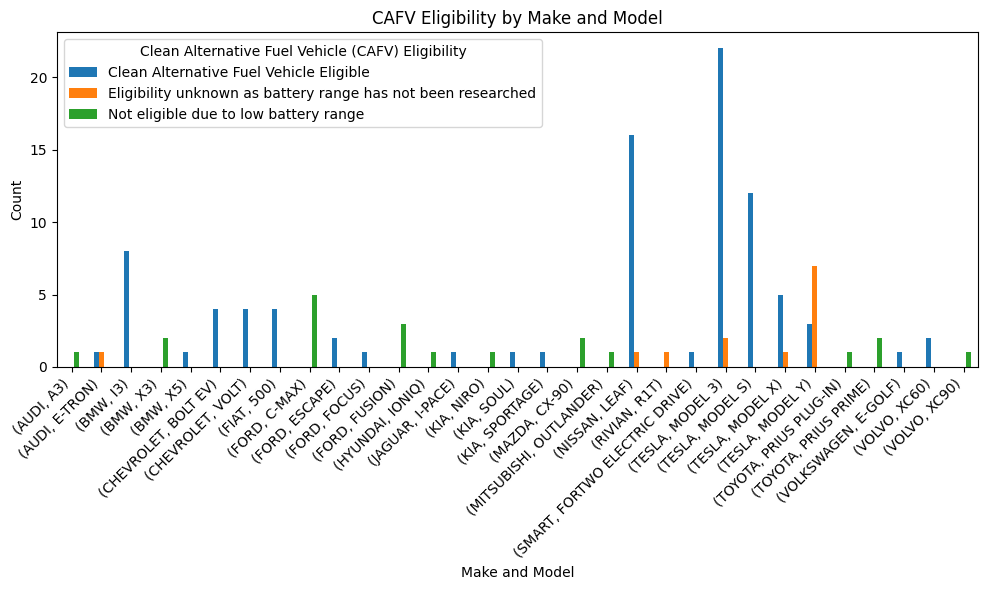

In [32]:
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('CAFV Eligibility by Make and Model')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
"""
Interpretation of Question #1
The Tesla Model 3 has the highest amount of CAFV Eligible vehicles. While there are other makes and models that are not very far behind
the Tesla Model 3, the graph and findings may suggest that Tesla invests more time, money, and resources into ensuring that their
electric vehicles meet eco-friendly and clean energy standards. 
"""

'\nInterpretation of Question #1\nThe Tesla Model 3 has the highest amount of CAFV Eligible vehicles. While there are other makes and models that are not very far behind\nthe Tesla Model 3, the graph and findings may suggest that Tesla invests more time, money, and resources into ensuring that their\nelectric vehicles meet eco-friendly and clean energy standards. \n'

In [34]:
# Question #2 Which vehicle makes have the highest average electric range?

In [36]:
avg_range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

In [37]:
avg_range_by_make

Make
JAGUAR        234.000000
TESLA         191.192308
CHEVROLET     144.000000
VOLKSWAGEN    125.000000
NISSAN        100.470588
FIAT           85.500000
AUDI           79.333333
BMW            65.363636
SMART          58.000000
KIA            51.000000
VOLVO          29.666667
HYUNDAI        29.000000
FORD           28.272727
MAZDA          26.000000
MITSUBISHI     22.000000
TOYOTA         18.666667
RIVIAN          0.000000
Name: Electric Range, dtype: float64

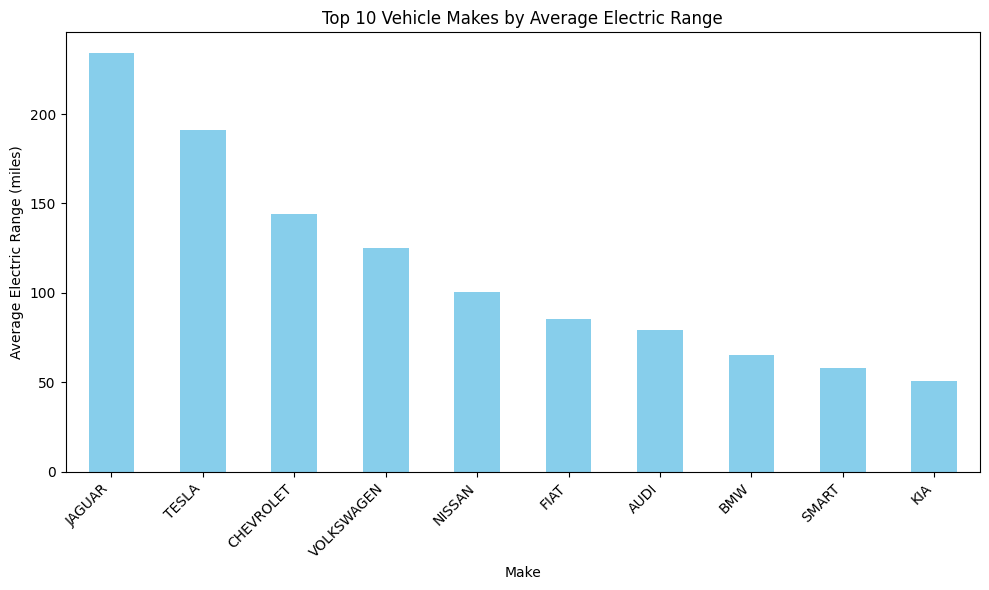

In [38]:
avg_range_by_make.head(10).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Vehicle Makes by Average Electric Range')
plt.xlabel('Make')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
"""
Interpretation of Question #2

The bar chart shows the top ten vehicle makes from the data set with the vehivles with the highest electric range. 
The makes with the highest ranges indicate that their companies are prioritizing and a leader in electric battery
technology, output, and range. For example, the top three (Jaguar, Tesla, and Chevrolet) makes and their position on
the bar graph may indicate that their vehicles are higher-end and/or have more technology, which also potentially
indicates higher price points.
"""

'\nInterpretation of Question #2\n\nThe bar chart shows the top ten vehicle makes from the data set with the vehivles with the highest electric range. \nThe makes with the highest ranges indicate that their companies are prioritizing and a leader in electric battery\ntechnology, output, and range. For example, the top three (Jaguar, Tesla, and Chevrolet) makes and their position on\nthe bar graph may indicate that their vehicles are higher-end and/or have more technology, which also potentially\nindicates higher price points.\n\n'

In [42]:
# Question #3: How does the average MSRP differ by electric vehicle type?

In [43]:
avg_msrp_by_ev_type = df.groupby('Electric Vehicle Type')['Base MSRP'].mean().sort_values(ascending=False)

In [44]:
avg_msrp_by_ev_type

Electric Vehicle Type
Battery Electric Vehicle (BEV)            3971.978022
Plug-in Hybrid Electric Vehicle (PHEV)    2029.687500
Name: Base MSRP, dtype: float64

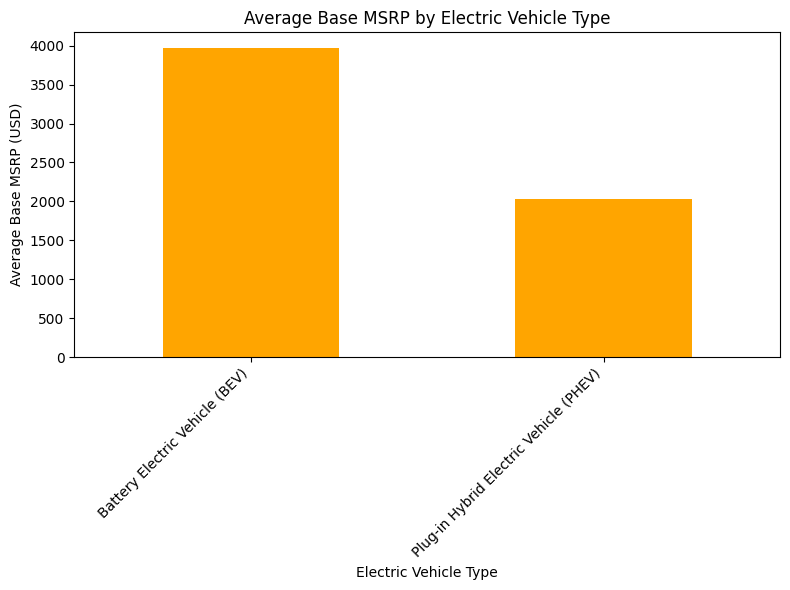

In [45]:
avg_msrp_by_ev_type.plot(kind='bar', figsize=(8,6), color='orange')
plt.title('Average Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Base MSRP (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
"""
Interpretation of Question #3

The above graph compares the average MSRP price point between battery electric vehicles (BEV) and 
plug-in hybrid electric vehicles (PHEV). The difference is almost $2000 dollars, with battery electric vehicles
costing, on average, almost $2000 more than their plug-in hybrid electric vehicle counterpart. This could be due to
several factors. The main factor being that PHEVs rely significantly on the already near-perfected technology of 
internal combustion engines. Their ICE engines then charge a small battery which can produce some power to the drivetrain
to enhance the efficiency of the vehicle. The lower amount of electronics and significant relying on the ICE engine as
opposed to BEVs certainly plays a role in the price difference.
"""

'\nInterpretation of Question #3\n\nThe above graph compares the average MSRP price point between battery electric vehicles (BEV) and \nplug-in hybrid electric vehicles (PHEV). The difference is almost $2000 dollars, with battery electric vehicles\ncosting, on average, almost $2000 more than their plug-in hybrid electric vehicle counterpart. This could be due to\nseveral factors. The main factor being that PHEVs rely significantly on the already near-perfected technology of \ninternal combustion engines. Their ICE engines then charge a small battery which can produce some power to the drivetrain\nto enhance the efficiency of the vehicle. The lower amount of electronics and significant relying on the ICE engine as\nopposed to BEVs certainly plays a role in the price difference.\n'

In [49]:
"""
Summary of project

The main three questions we asked in this project were these:

1. Which make and model has the largest quantity of CAFV Eligible vehicles?
2. Which vehicle makes have the highest average electric range?
3. How does the average MSRP differ by electric vehicle type?

The findings were relatively clear and consistent with expectations.

Things I would need to further explore and address regarding this topic and data set would be exploring the same above questions
with a much larger data set. The data set I used was a clipping of a much larger data set, containing many more cars and their
information. This would certainly result in at least slightly different findings.

"""

'\nSummary of project\n\nThe main three questions we asked in this project were these:\n\n1. Which make and model has the largest quantity of CAFV Eligible vehicles?\n2. Which vehicle makes have the highest average electric range?\n3. How does the average MSRP differ by electric vehicle type?\n\nThe findings were relatively clear and consistent with expectations.\n\nThings I would need to further explore and address regarding this topic and data set would be exploring the same above questions\nwith a much larger data set. The data set I used was a clipping of a much larger data set, containing many more cars and their\ninformation. This would certainly result in at least slightly different findings.\n\n'